In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
# os.chdir('/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePosNewReg/')
# import 
regionDirectory = '/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePosNewReg/'

In [3]:
dirlist = os.listdir('/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePosNewReg/')
dirlist29005 = [x for x in dirlist if '29005_results' in x]
sorted(dirlist29005)

['29005_results_region_10.py',
 '29005_results_region_12.py',
 '29005_results_region_14.py',
 '29005_results_region_16.py',
 '29005_results_region_18.py',
 '29005_results_region_2.py',
 '29005_results_region_20.py',
 '29005_results_region_4.py',
 '29005_results_region_6.py',
 '29005_results_region_8.py']

In [4]:
imageIDs = ['29005_results','29007_results','29009_results','29010_results','29011_results','29012_results',
            '29013_results','29014_results','29015_results','29016_results','29017_results','29018_results',
           '29019_results','29020_results','29021_results''29022_results','79940_results','79941_results',
           '79942_results','79943_results','79944_results','79945_results','79946_results','79947_results',
           '79948_results','79949_results','79950_results']

In [5]:
def makeQuality(Nrecovered,Ntarget,Ntot,weight=0.5):
    Nmax = max(Ntot)
    completeNess = [float(x)/float(y) if y != 0 else 0 for x,y in zip(Nrecovered,Ntarget)]
    completeNess = [x if x < 1. else 1. for x in completeNess]
    #accuracy = [1. - (float(x)/float(Nmax)) for x in Ntot]
    accuracy = [float(x)/float(y) if y !=0 else 0 for x,y in zip(Nrecovered,Ntot)]
    accuracyNormaliser = 1./ max(accuracy)
    accuracy = [x*accuracyNormaliser for x in accuracy]
    #quality = (completeNess*weight) + ((1-weight)*accuracy)
    quality = [(float(c)*weight) + ((1.-weight)*float(a)) for c,a in zip(completeNess,accuracy)]
    return [quality,accuracy,completeNess]

In [6]:
loc1 = dirlist29005[0].index('region_') + len('region_')
loc2 = dirlist29005[0].index('.py')
print(dirlist29005[0][loc1:loc2])

20


In [7]:
def compareRegionResults(dirlist,imID,regDir=regionDirectory):
    os.chdir(regDir)
    resultsDictionary = {}

    for inFile in dirlist:
        loc1 = inFile.index('region_') + len('region_')
        loc2 = inFile.index('.py')
        regSize = inFile[loc1:loc2]
        subprocess.call(['cp',inFile,'./tempPython.py'])
        if inFile != dirlist[0]:
            results = reload(tempPython)
        else:
            import tempPython
        qualities = makeQuality(tempPython.Nrecovered,tempPython.Ntarget,tempPython.Ntot)
        resultsDictionary[regSize] = qualities
        
    simpleResultDict = {}
    maxResultsDict = {}
    keys = []
    for key,value in resultsDictionary.items():
        quality = np.mean(value[0])
        accuracy = np.mean(value[1])
        completeness = np.mean(value[2])

        maxQuality = np.max(value[0])
        maxAccuracy = np.max(value[1])
        maxCompleteness = np.max(value[2])

        simpleResultDict[key] = [quality,accuracy,completeness]
        maxResultsDict[key] = [maxQuality,maxAccuracy,maxCompleteness]
        keys.append(key)
        
    keysSorted = sorted(keys,key=int)
    xAxis = np.arange(len(keysSorted))
    
    resultsList = [simpleResultDict[x][0] for x in keysSorted]
    accuracyList = [simpleResultDict[x][1] for x in keysSorted]
    completenessList = [simpleResultDict[x][2] for x in keysSorted]
    
    fig,ax = plt.subplots(1,3,figsize=(16,4))

    plt.setp(ax,xticks=xAxis,xticklabels=keysSorted)
    
    ax[0].bar(xAxis,resultsList)
    #ax[0].set_xticks(xAxis,keysSorted)
    ax[0].set_xlabel('Region Size (Pixels)')
    ax[0].set_ylabel('Quality Score')

    ax[1].bar(xAxis,accuracyList)
    ax[1].set_title('Image - '+imID)
    #ax[1].set_xticks(xAxis,keysSorted)
    ax[1].set_xlabel('Region Size (Pixels)')
    ax[1].set_ylabel('Accuracy Score')

    ax[2].bar(xAxis,completenessList)
    #ax[2].set_xticks(xAxis,keysSorted)
    ax[2].set_xlabel('Region Size (Pixels)')
    ax[2].set_ylabel('Completeness Score')

    plt.show()
    
    resultsListMax = [maxResultsDict[x][0] for x in keysSorted]
    accuracyListMax = [maxResultsDict[x][1] for x in keysSorted]
    completenessListMax = [maxResultsDict[x][2] for x in keysSorted]
    
    fig,ax = plt.subplots(1,3,figsize=(16,4))

    plt.setp(ax,xticks=xAxis,xticklabels=keysSorted)

    ax[0].bar(xAxis,resultsListMax)
    #ax[0].set_xticks(xAxis,keysSorted)
    ax[0].set_xlabel('Region Size (Pixels)')
    ax[0].set_ylabel('Quality Score (max)')

    ax[1].set_title('Image - '+imID)
    ax[1].bar(xAxis,accuracyListMax)
    #ax[1].set_xticks(xAxis,keysSorted)
    ax[1].set_xlabel('Region Size (Pixels)')
    ax[1].set_ylabel('Accuracy Score (max)')

    ax[2].bar(xAxis,completenessListMax)
    #ax[2].set_xticks(xAxis,keysSorted)
    ax[2].set_xlabel('Region Size (Pixels)')
    ax[2].set_ylabel('Completeness Score (max)')

    plt.show()
    
    return [[resultsList,accuracyList,completenessList],[resultsListMax,accuracyListMax,completenessListMax]]

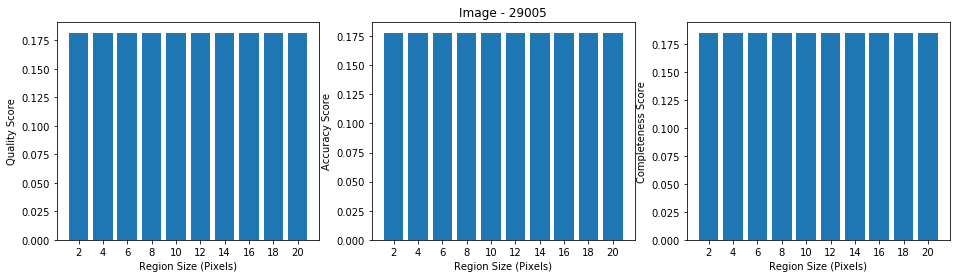

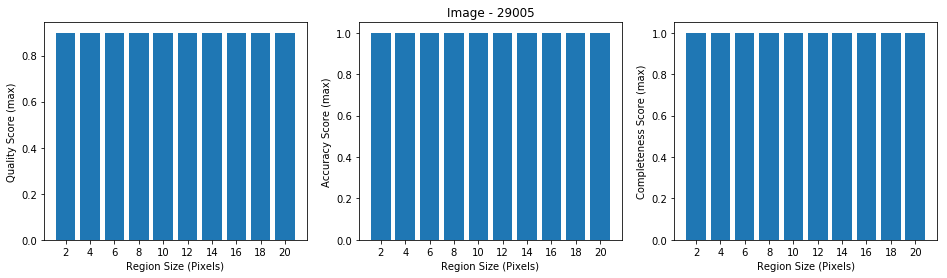

In [8]:
testressy = compareRegionResults(dirlist29005,'29005')

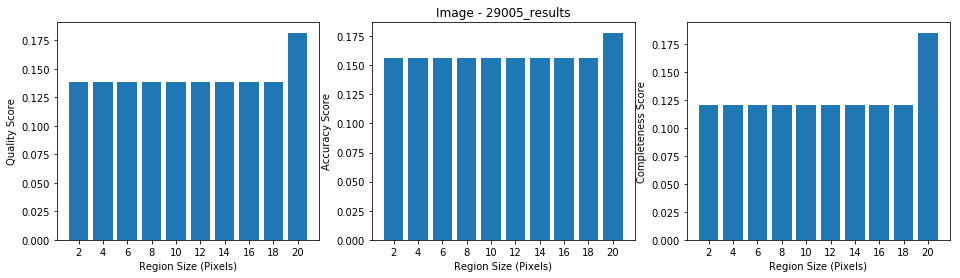

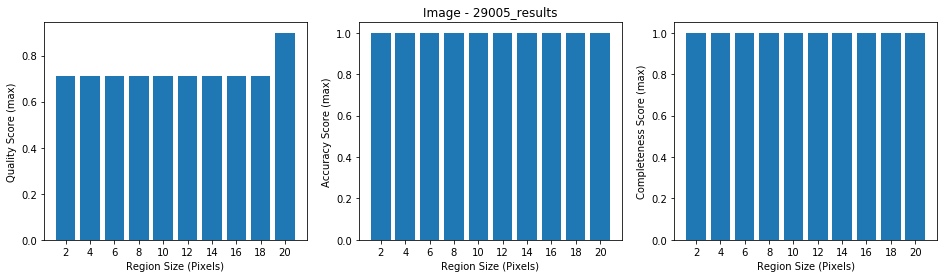

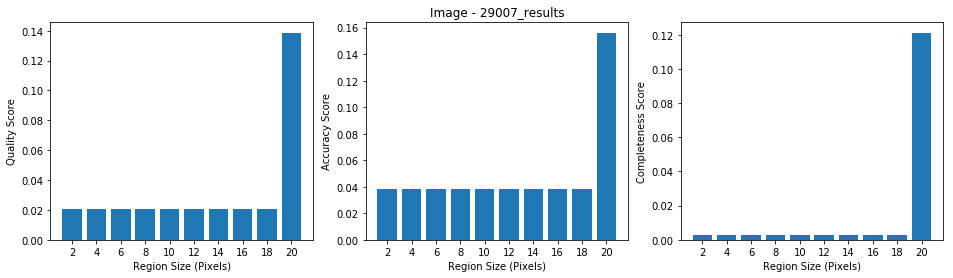

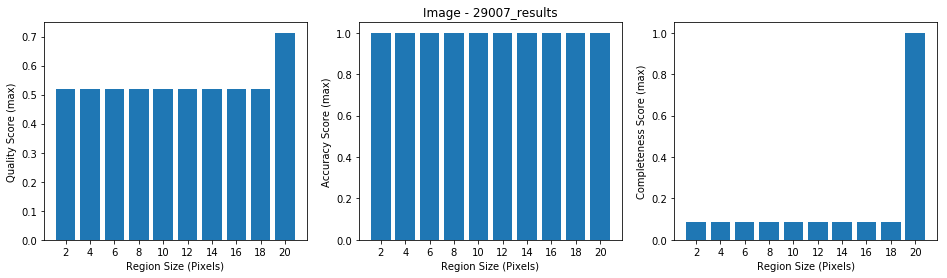

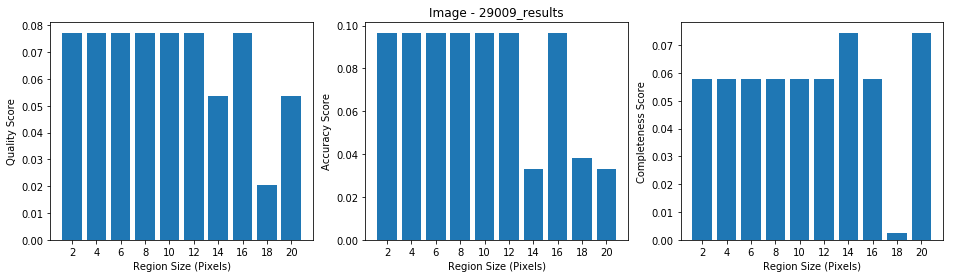

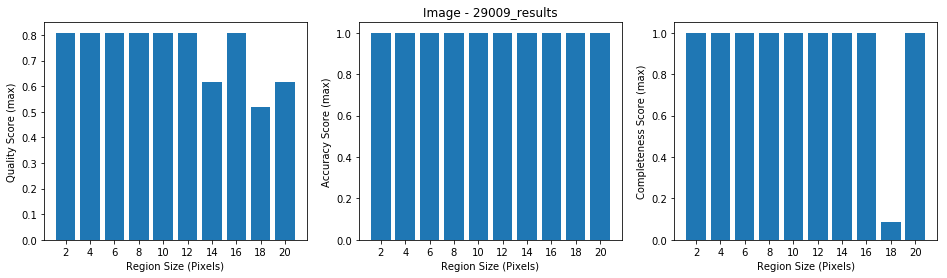

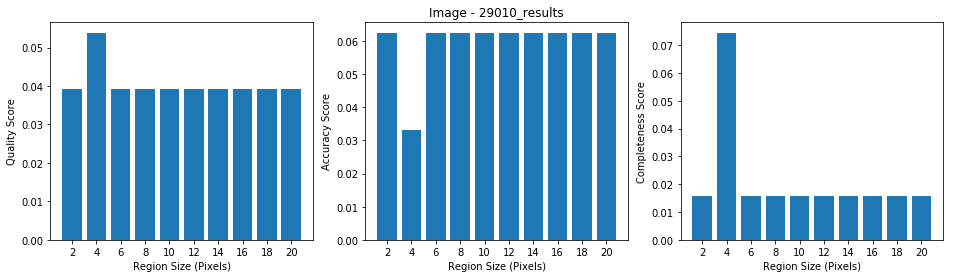

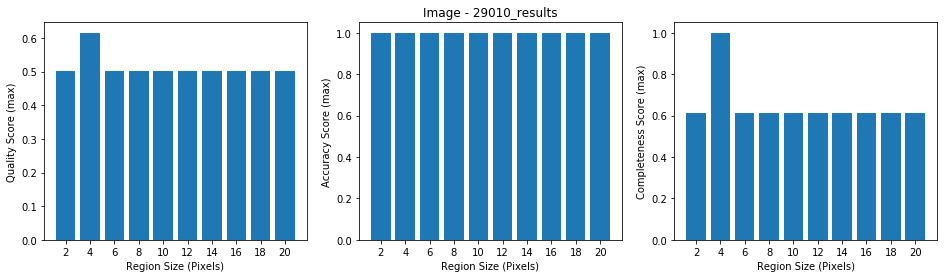

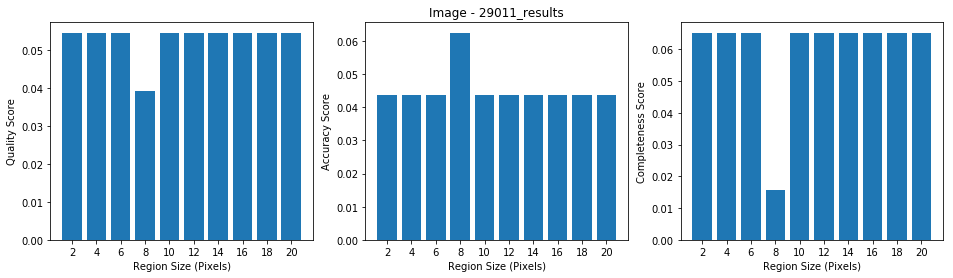

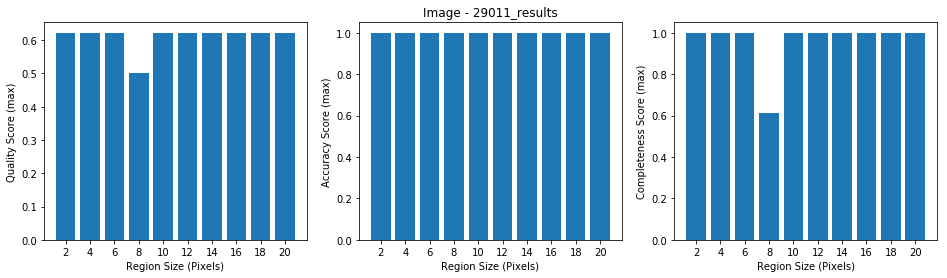

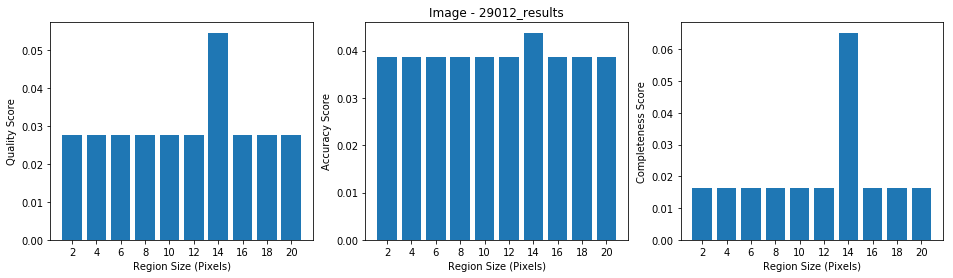

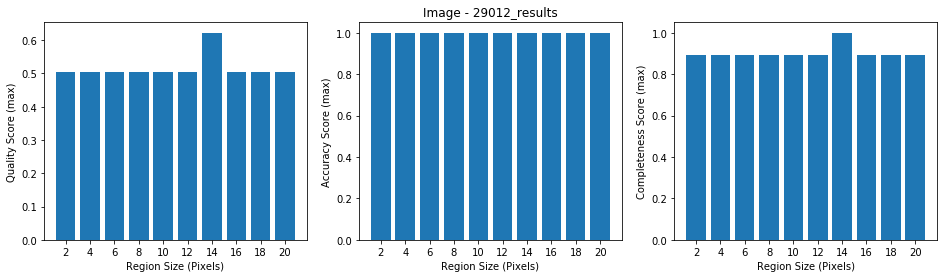

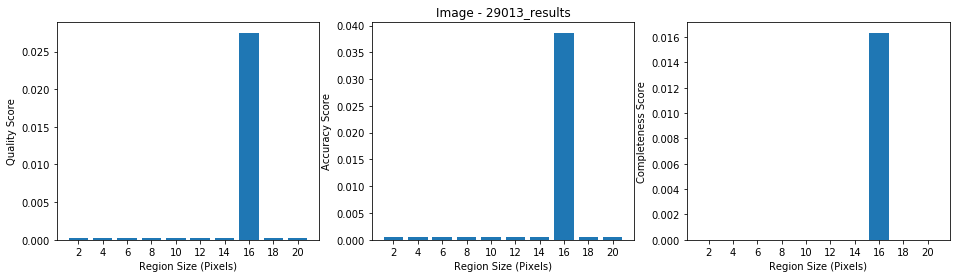

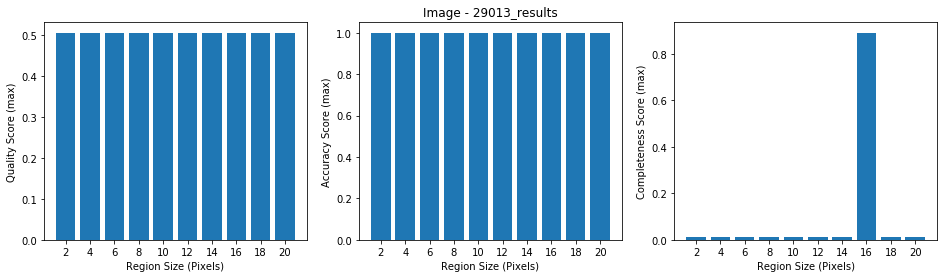

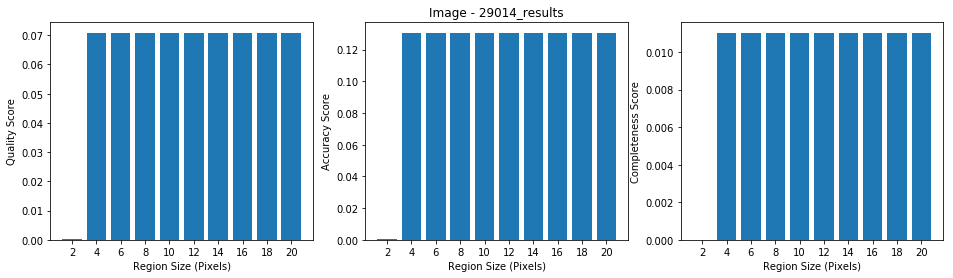

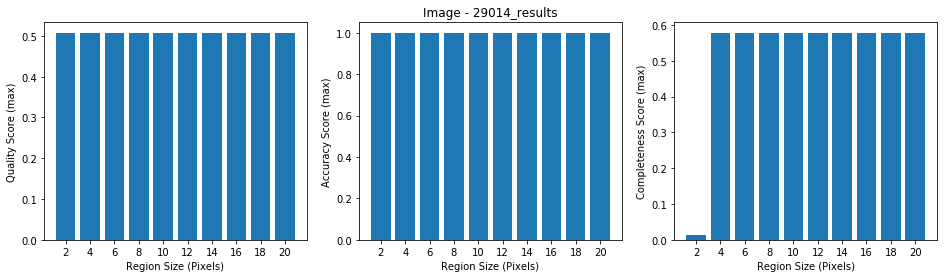

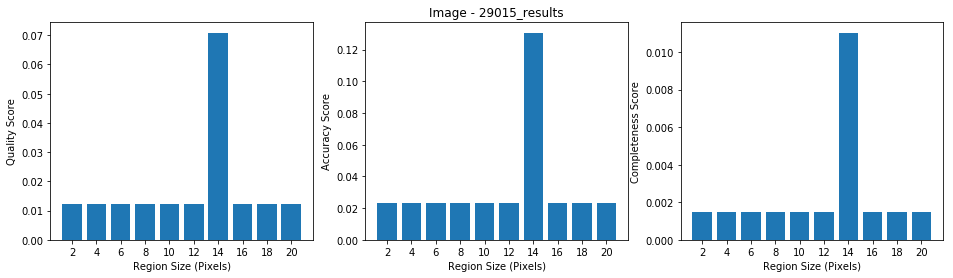

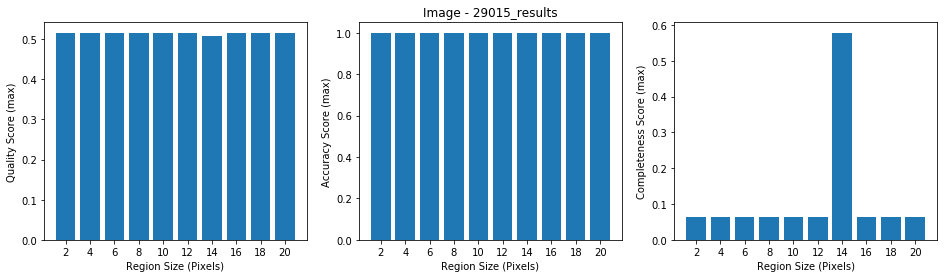

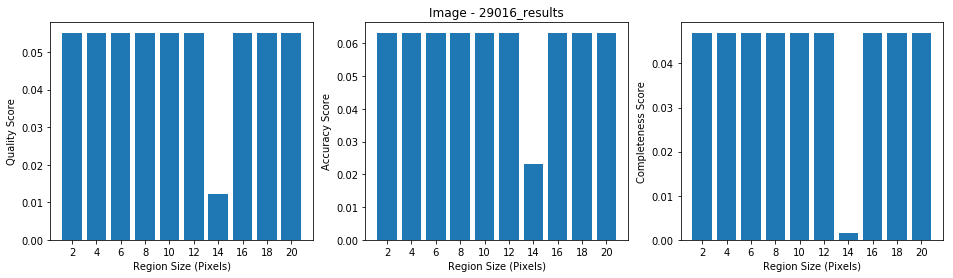

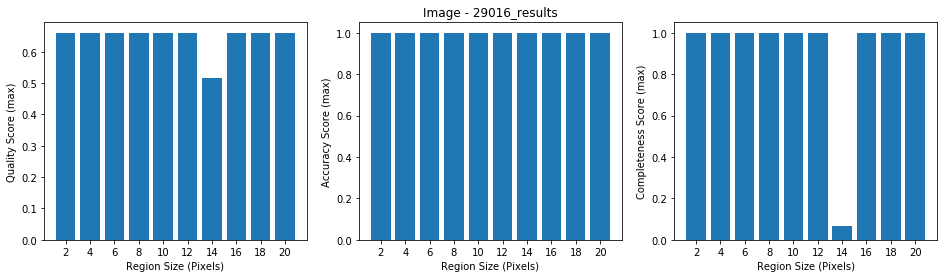

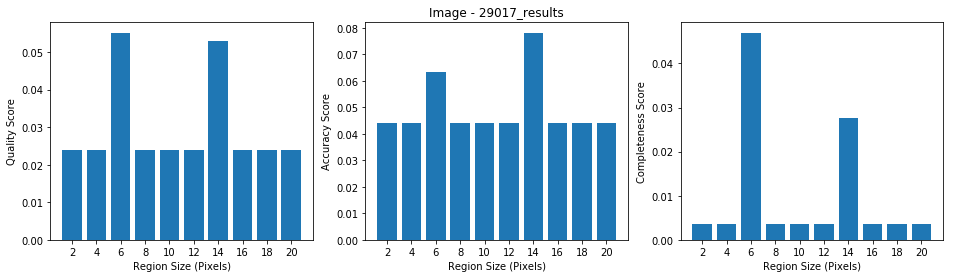

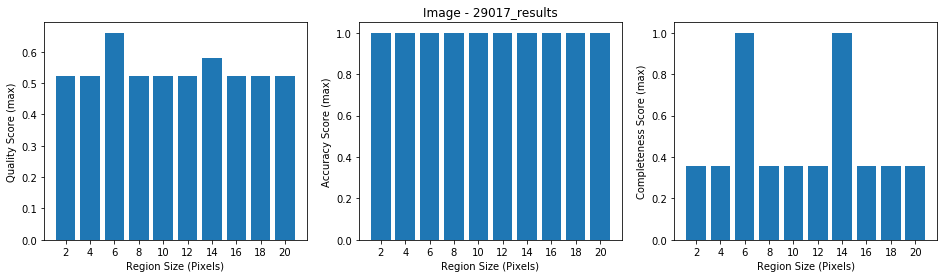

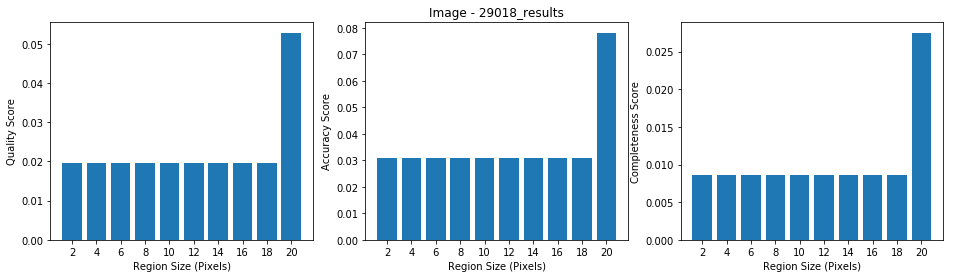

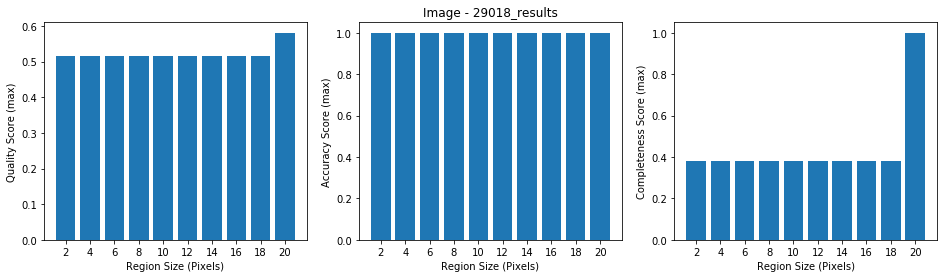

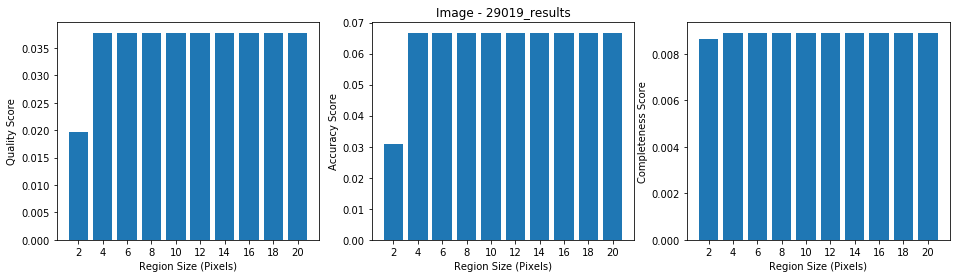

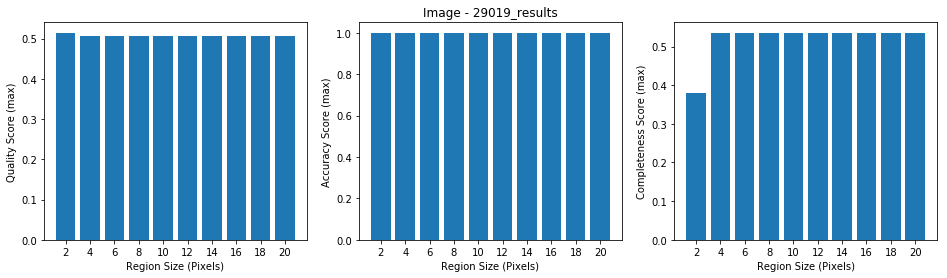

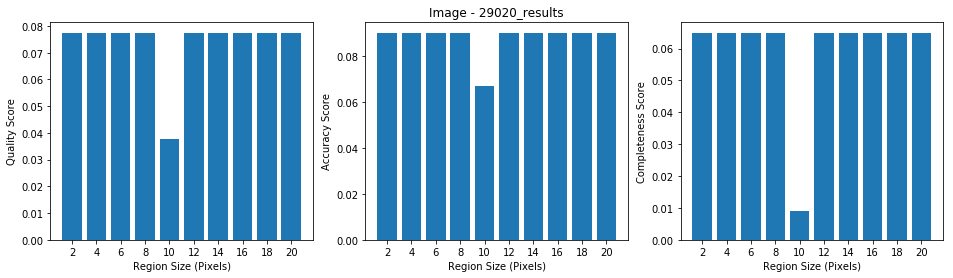

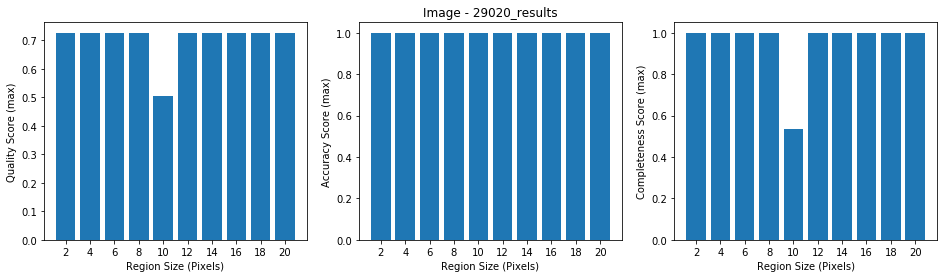

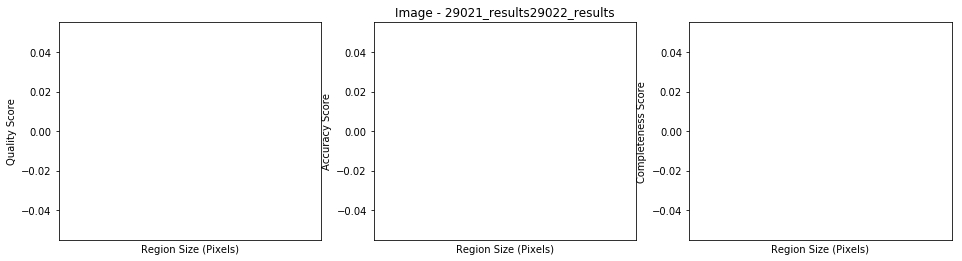

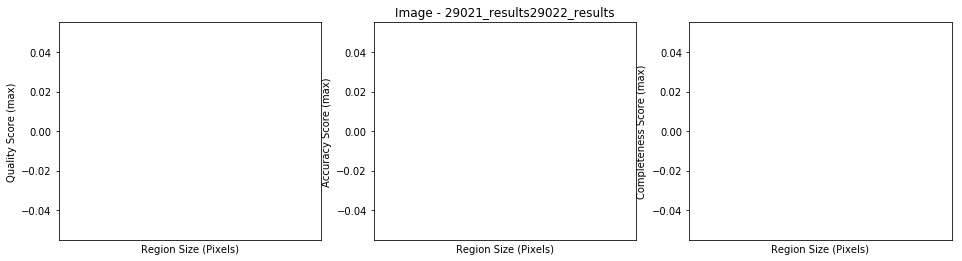

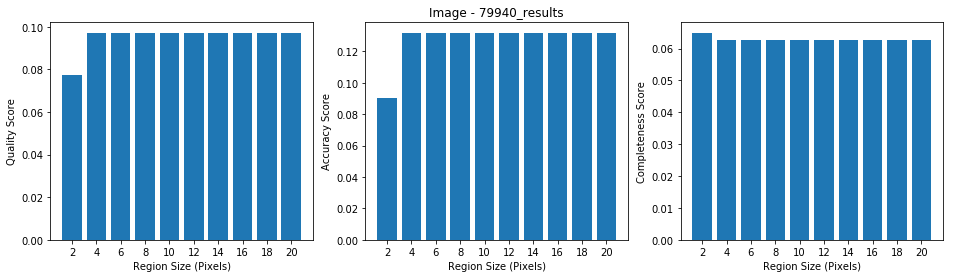

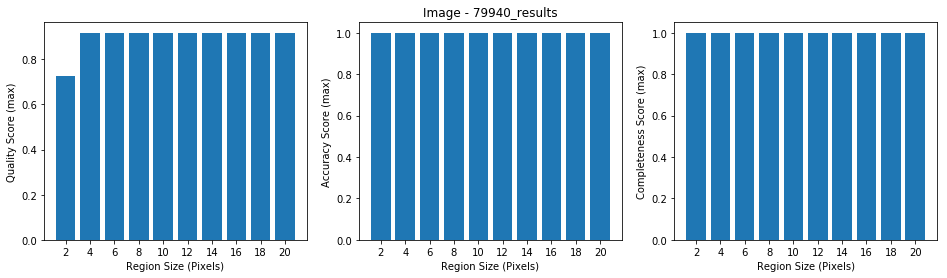

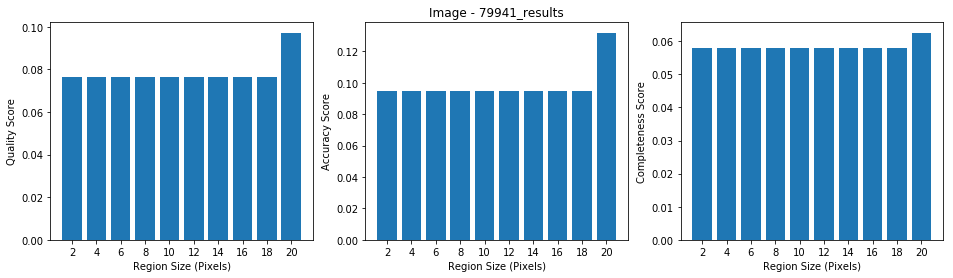

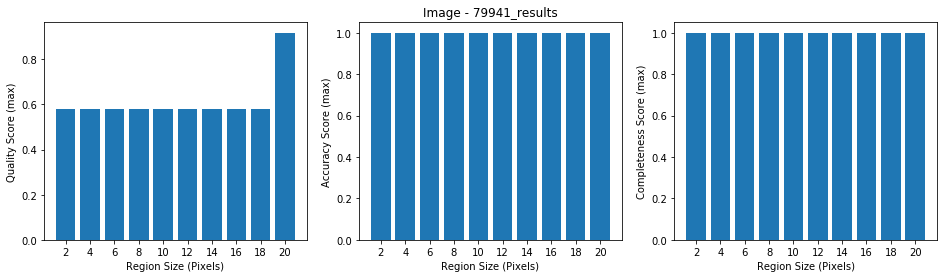

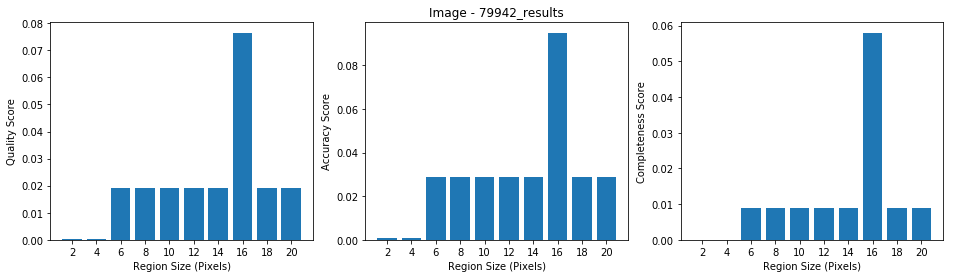

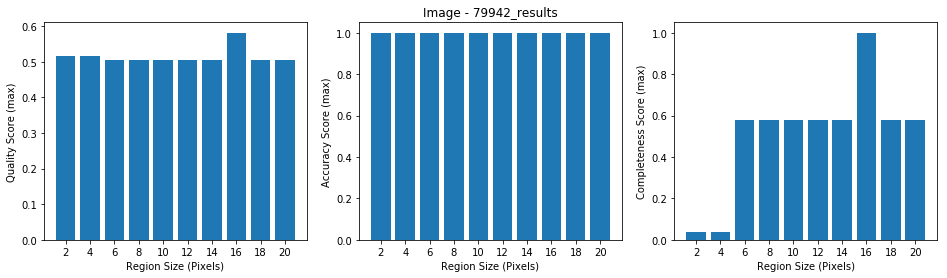

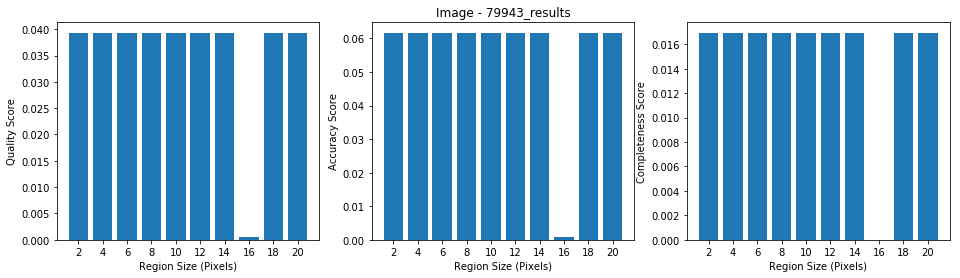

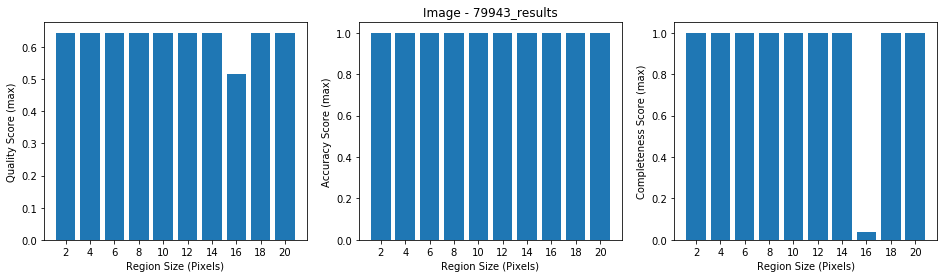

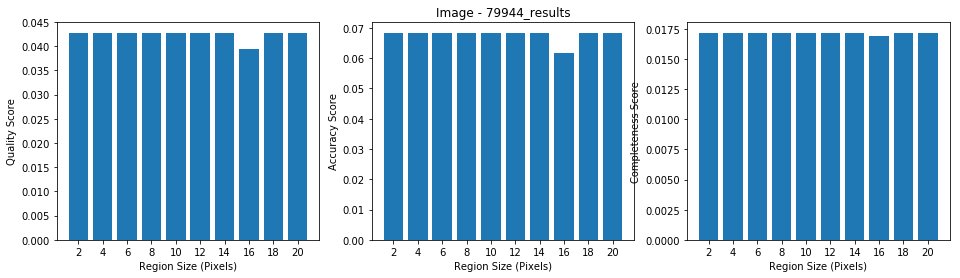

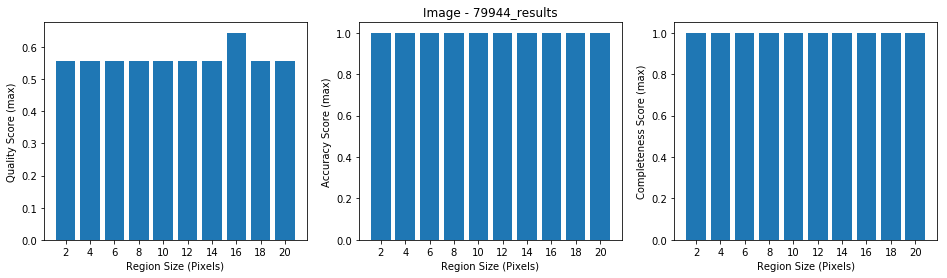

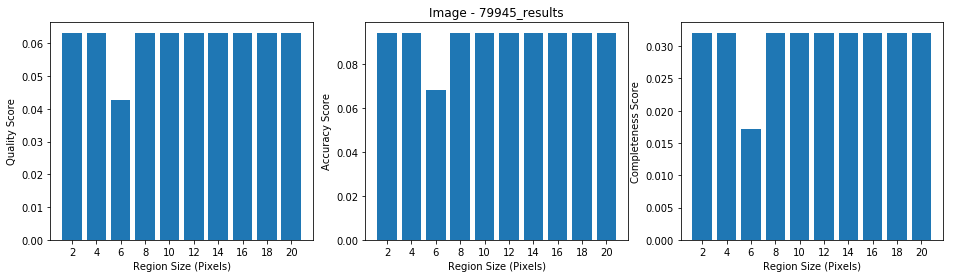

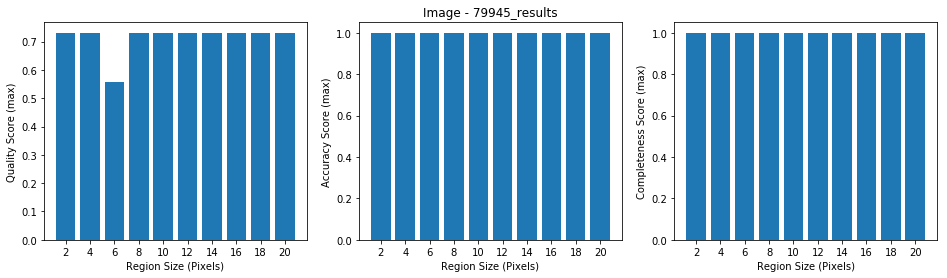

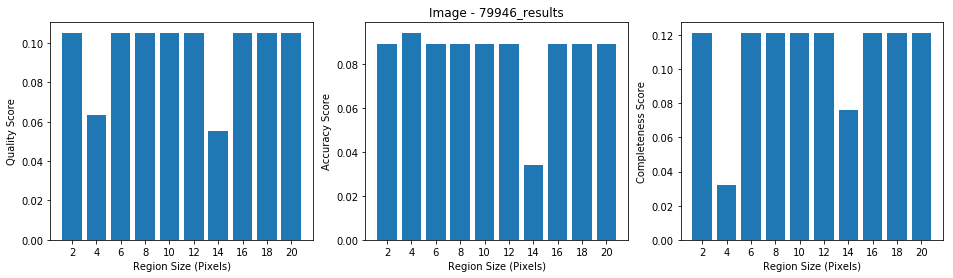

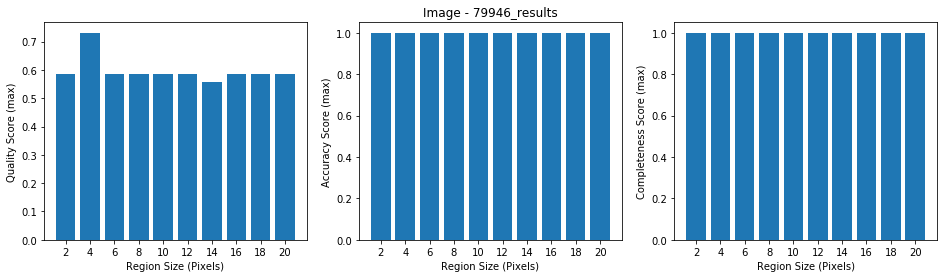

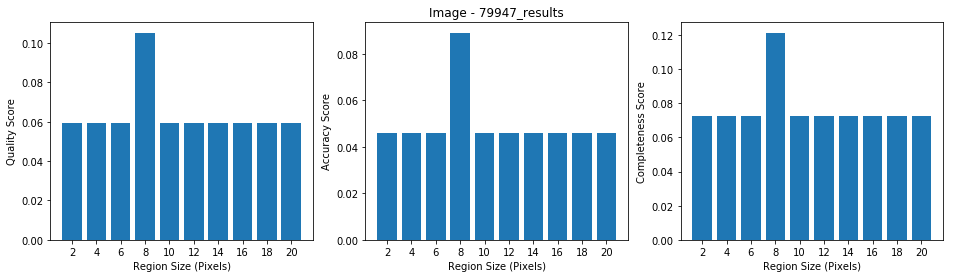

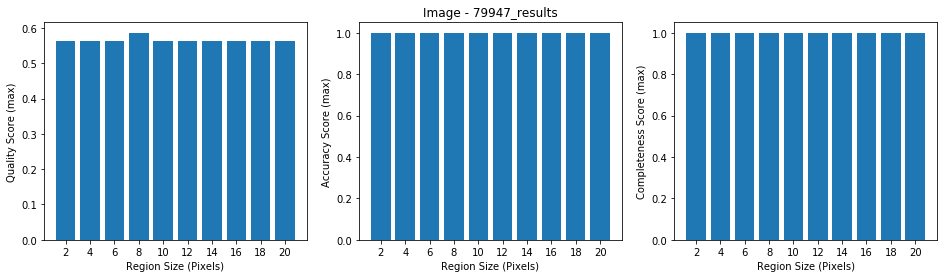

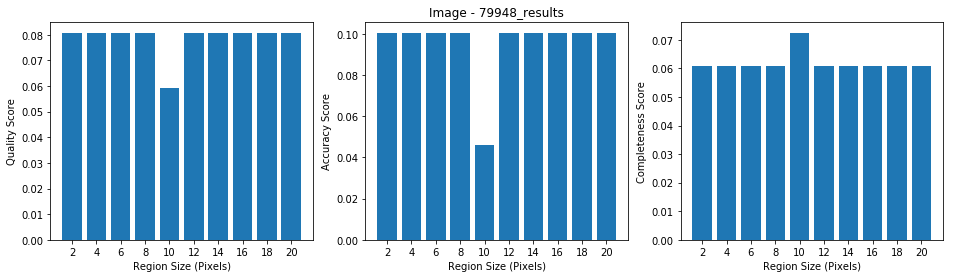

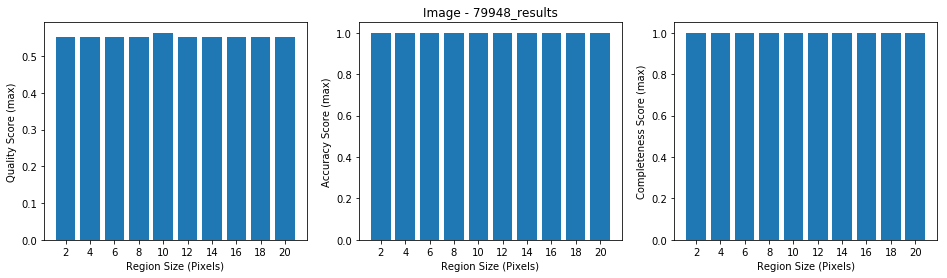

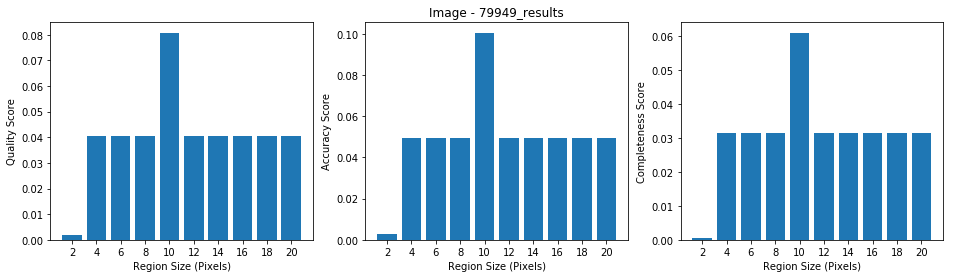

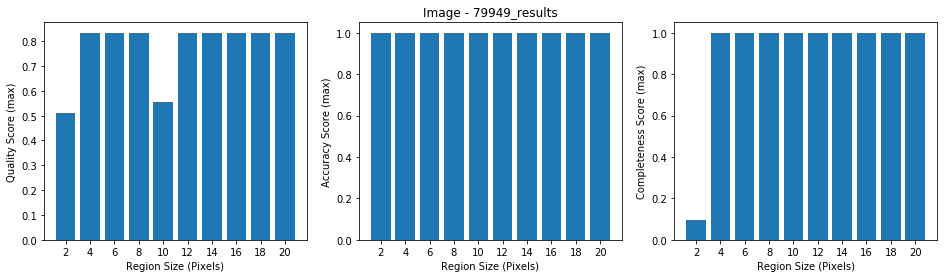

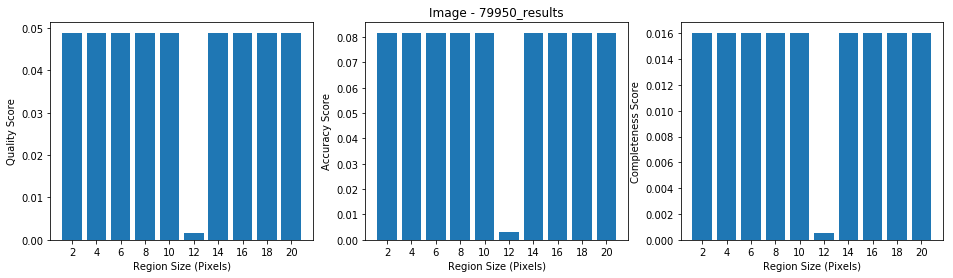

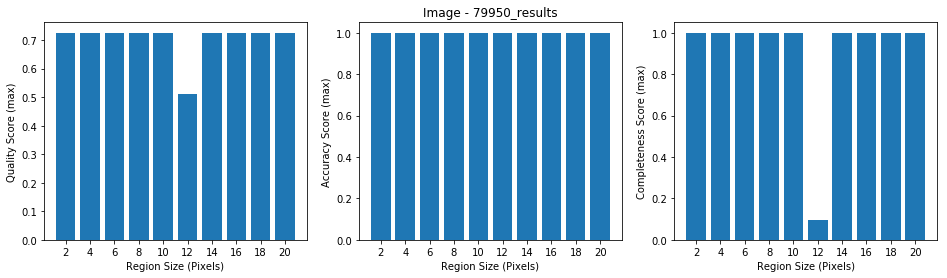

In [9]:
fullResultDict = {}
for imID in imageIDs:
    dirlistNew = [x for x in dirlist if imID in x]
    fullResultDict[imID] = compareRegionResults(dirlistNew,imID)
    #last thing to do here is make a function to combine all the results from each region simulation and graph it

In [10]:
print(fullResultDict[imageIDs[0]])

[[[0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.13868625535895485, 0.18175746356518763], [0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.15618203452743354, 0.17798582660127474], [0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.12119047619047621, 0.18552910052910054]], [[0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.7131699789220115, 0.89911265432098764], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]]


In [31]:
fullResultDict

{'29005_results': [[[0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.13868625535895485,
    0.18175746356518763],
   [0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.15618203452743354,
    0.17798582660127474],
   [0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.12119047619047621,
    0.18552910052910054]],
  [[0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.7131699789220115,
    0.8991126

In [36]:
initialiser = 0
for key,value in fullResultDict.items():
    if value != [[[], [], []], [[], [], []]]:
        if initialiser == 0:
            bigDict = fullResultDict[key]
            print(key)
            print(fullResultDict[key])
            initialiser += 1
        else:
            initialiser += 1
            for x in range(len(bigDict)):
                for y in range(len(bigDict[x])):
                    bigDict[x][y] = [i + j for i,j in zip(bigDict[x][y],value[x][y])]

print(bigDict)
for x in range(len(bigDict)):
    for y in range(len(bigDict[x])):
        bigDict[x][y] = [val/initialiser for val in bigDict[x][y]]

29015_results
[[[0.012254801662804637, 0.012254801662804637, 0.012254801662804637, 0.012254801662804637, 0.012254801662804637, 0.012254801662804637, 0.07085560200789906, 0.012254801662804637, 0.012254801662804637, 0.012254801662804637], [0.023019587964626168, 0.023019587964626168, 0.023019587964626168, 0.023019587964626168, 0.023019587964626168, 0.023019587964626168, 0.1306844183015124, 0.023019587964626168, 0.023019587964626168, 0.023019587964626168], [0.0014900153609831027, 0.0014900153609831027, 0.0014900153609831027, 0.0014900153609831027, 0.0014900153609831027, 0.0014900153609831027, 0.011026785714285715, 0.0014900153609831027, 0.0014900153609831027, 0.0014900153609831027]], [[0.5161290322580645, 0.5161290322580645, 0.5161290322580645, 0.5161290322580645, 0.5161290322580645, 0.5161290322580645, 0.5078125, 0.5161290322580645, 0.5161290322580645, 0.5161290322580645], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.064516129032258063, 0.064516129032258063, 0.064516129032258063

In [22]:
keysSorted = range(2,22,2)
print(keysSorted)
keysSorted = [str(x) for x in keysSorted]
xAxis = np.arange(len(keysSorted))

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [37]:
bigDict

[[[0.046018337432957711,
   0.051229105258915032,
   0.05369336850855335,
   0.055221353703689073,
   0.052319152145192643,
   0.053222400736349519,
   0.053147096226125227,
   0.055067665824666559,
   0.050746591192166728,
   0.061567308216025886],
  [0.057575822174476154,
   0.067599911894828751,
   0.069561158769042911,
   0.071730689291483782,
   0.068709140940155913,
   0.069860240985664832,
   0.069352963922525226,
   0.071458198442784476,
   0.067314000514981279,
   0.076857600966445144],
  [0.034460852691439239,
   0.034858298623001313,
   0.03782557824806377,
   0.038712018115894344,
   0.035929163350229366,
   0.036584560487034186,
   0.036941228529725235,
   0.038677133206548621,
   0.034179181869352149,
   0.046277015465606607]],
 [[0.58634271688105866,
   0.61966653385745785,
   0.60636771239511233,
   0.60894051217783063,
   0.58658970602111804,
   0.607941601230371,
   0.59940460214048263,
   0.6095277736009157,
   0.59536549283486462,
   0.63357562791608824],
  [1.0, 1.

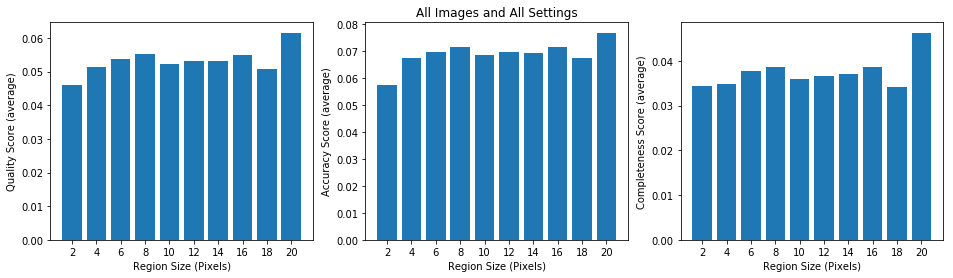

In [39]:
resultsListMax = bigDict[0][0] 
accuracyListMax = bigDict[0][1] 
completenessListMax = bigDict[0][2] 

fig,ax = plt.subplots(1,3,figsize=(16,4))

plt.setp(ax,xticks=xAxis,xticklabels=keysSorted)

ax[0].bar(xAxis,resultsListMax)
#ax[0].set_xticks(xAxis,keysSorted)
ax[0].set_xlabel('Region Size (Pixels)')
ax[0].set_ylabel('Quality Score (average)')

ax[1].set_title('All Images and All Settings')
ax[1].bar(xAxis,accuracyListMax)
#ax[1].set_xticks(xAxis,keysSorted)
ax[1].set_xlabel('Region Size (Pixels)')
ax[1].set_ylabel('Accuracy Score (average)')

ax[2].bar(xAxis,completenessListMax)
#ax[2].set_xticks(xAxis,keysSorted)
ax[2].set_xlabel('Region Size (Pixels)')
ax[2].set_ylabel('Completeness Score (average)')

plt.show()


In [13]:
os.chdir('/home/mj1e16/moleGazer/Photos/F/fitsImages/simMolePosNewReg/')
resultsDictionary = {}

for inFile in dirlist:
    loc1 = inFile.index('region_') + len('region_')
    loc2 = inFile.index('.py')
    regSize = inFile[loc1:loc2]
    subprocess.call(['cp',inFile,'./tempPython.py'])
    if inFile != dirlist[0]:
        results = reload(tempPython)
    else:
        import tempPython
    qualities = makeQuality(tempPython.Nrecovered,tempPython.Ntarget,tempPython.Ntot)
    resultsDictionary[regSize] = qualities

In [17]:
len(resultsDictionary['20'][1])

4200

In [15]:
simpleResultDict = {}
maxResultsDict = {}
keys = []
for key,value in resultsDictionary.items():
    quality = np.mean(value[0])
    accuracy = np.mean(value[1])
    completeness = np.mean(value[2])
    
    maxQuality = np.max(value[0])
    maxAccuracy = np.max(value[1])
    maxCompleteness = np.max(value[2])
    
    simpleResultDict[key] = [quality,accuracy,completeness]
    maxResultsDict[key] = [maxQuality,maxAccuracy,maxCompleteness]
    keys.append(key)

NameError: name 'resultsDictionary' is not defined

In [14]:
keysSorted = sorted(keys,key=int)
xAxis = np.arange(len(keysSorted))

NameError: name 'keys' is not defined

In [38]:
resultsList = [simpleResultDict[x][0] for x in keysSorted]
accuracyList = [simpleResultDict[x][1] for x in keysSorted]
completenessList = [simpleResultDict[x][2] for x in keysSorted]

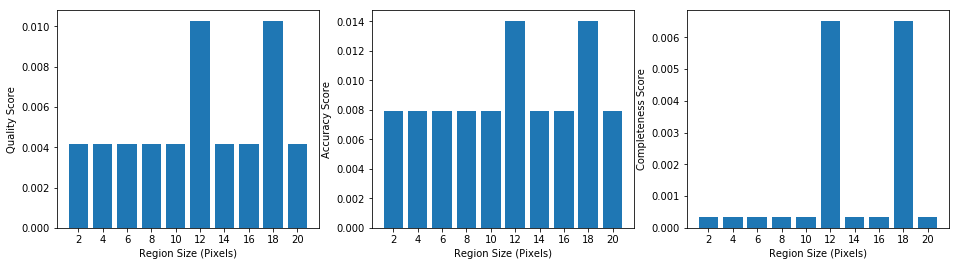

In [40]:
fig,ax = plt.subplots(1,3,figsize=(16,4))

plt.setp(ax,xticks=xAxis,xticklabels=keysSorted)

ax[0].bar(xAxis,resultsList)
#ax[0].set_xticks(xAxis,keysSorted)
ax[0].set_xlabel('Region Size (Pixels)')
ax[0].set_ylabel('Quality Score')

ax[1].bar(xAxis,accuracyList)
#ax[1].set_xticks(xAxis,keysSorted)
ax[1].set_xlabel('Region Size (Pixels)')
ax[1].set_ylabel('Accuracy Score')

ax[2].bar(xAxis,completenessList)
#ax[2].set_xticks(xAxis,keysSorted)
ax[2].set_xlabel('Region Size (Pixels)')
ax[2].set_ylabel('Completeness Score')

plt.show()

In [42]:
resultsList = [maxResultsDict[x][0] for x in keysSorted]
accuracyList = [maxResultsDict[x][1] for x in keysSorted]
completenessList = [maxResultsDict[x][2] for x in keysSorted]

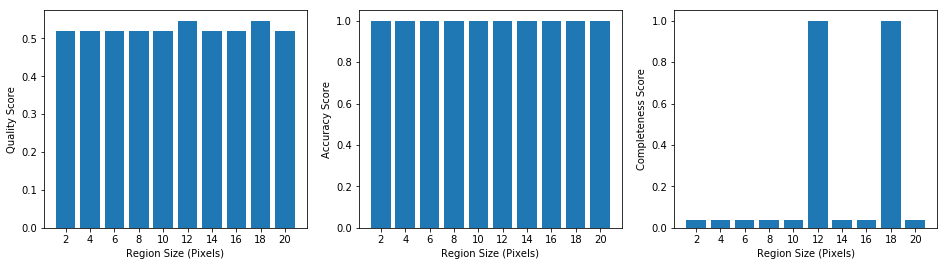

In [43]:
fig,ax = plt.subplots(1,3,figsize=(16,4))

plt.setp(ax,xticks=xAxis,xticklabels=keysSorted)

ax[0].bar(xAxis,resultsList)
#ax[0].set_xticks(xAxis,keysSorted)
ax[0].set_xlabel('Region Size (Pixels)')
ax[0].set_ylabel('Quality Score')

ax[1].bar(xAxis,accuracyList)
#ax[1].set_xticks(xAxis,keysSorted)
ax[1].set_xlabel('Region Size (Pixels)')
ax[1].set_ylabel('Accuracy Score')

ax[2].bar(xAxis,completenessList)
#ax[2].set_xticks(xAxis,keysSorted)
ax[2].set_xlabel('Region Size (Pixels)')
ax[2].set_ylabel('Completeness Score')

plt.show()